# Target Guided Ordinal Encoding — Let Your Target Teach the Encoding

**Objective**: Learn how to **encode categories using the target variable** — a **powerful trick** to improve model performance — with **two real-world examples**.

---

## 1. Introduction

### What is Target Guided Encoding?

- Replace each category with a **number based on the target**
- Example: Replace `Neighborhood` with **average house price** in that area

**Why?** Because some neighborhoods are **more expensive** → model should know that!

### Why Random Encoding Fails

```python
Neighborhood: A → 0, B → 1, C → 2  # No meaning!
```
→ Model sees no pattern in prices

### When to Use

- **High-cardinality categorical features** (many unique values)
- **Strong relationship** between category and target
- Works with **linear models**, **trees**, **neural nets**

---

## 2. Example 1: House Price Prediction by Neighborhood

We have 6 houses from 3 neighborhoods:

| House ID | Neighborhood | Price (Lakhs) |
|---------|--------------|---------------|
| 1 | Green Park | 120 |
| 2 | Rohini | 60 |
| 3 | Greater Kailash | 180 |
| 4 | Green Park | 130 |
| 5 | Rohini | 55 |
| 6 | Greater Kailash | 175 |

**Goal**: Predict price → **Neighborhood should help!**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataset
df_house = pd.DataFrame({
    'neighborhood': ['Green Park', 'Rohini', 'Greater Kailash', 'Green Park', 'Rohini', 'Greater Kailash'],
    'price': [120, 60, 180, 130, 55, 175]
})

print("House Price Data:")
df_house

House Price Data:


,neighborhood,price
0,Green Park,120
1,Rohini,60
2,Greater Kailash,180
3,Green Park,130
4,Rohini,55
5,Greater Kailash,175


### Step-by-Step: Target Guided Encoding (House Prices)

In [6]:
# Step 1: Compute mean price per neighborhood
mean_price = df_house.groupby('neighborhood')['price'].mean().sort_values()
print("Average Price by Neighborhood:")
print(mean_price.round(2))

Average Price by Neighborhood:
neighborhood
Rohini              57.5
Green Park         125.0
Greater Kailash    177.5
Name: price, dtype: float64


In [ ]:
# Step 2: Assign rank (1 = cheapest)
rank_map = {nb: rank + 1 for rank, nb in enumerate(mean_price.index)} 
print("\nRank Mapping:")
for nb, rank in rank_map.items():
    print(f"  {nb} → Rank {rank} (Avg: {mean_price[nb]:.0f} Lakhs)")


Rank Mapping:
  Rohini → Rank 1 (Avg: 58 Lakhs)
  Green Park → Rank 2 (Avg: 125 Lakhs)
  Greater Kailash → Rank 3 (Avg: 178 Lakhs)


In [8]:
# Step 3: Map to data
df_house['neighborhood_encoded'] = df_house['neighborhood'].map(rank_map)
print("\nAfter Encoding:")
df_house[['neighborhood', 'price', 'neighborhood_encoded']]


After Encoding:


,neighborhood,price,neighborhood_encoded
0,Green Park,120,2
1,Rohini,60,1
2,Greater Kailash,180,3
3,Green Park,130,2
4,Rohini,55,1
5,Greater Kailash,175,3


### Visualization: House Price Example

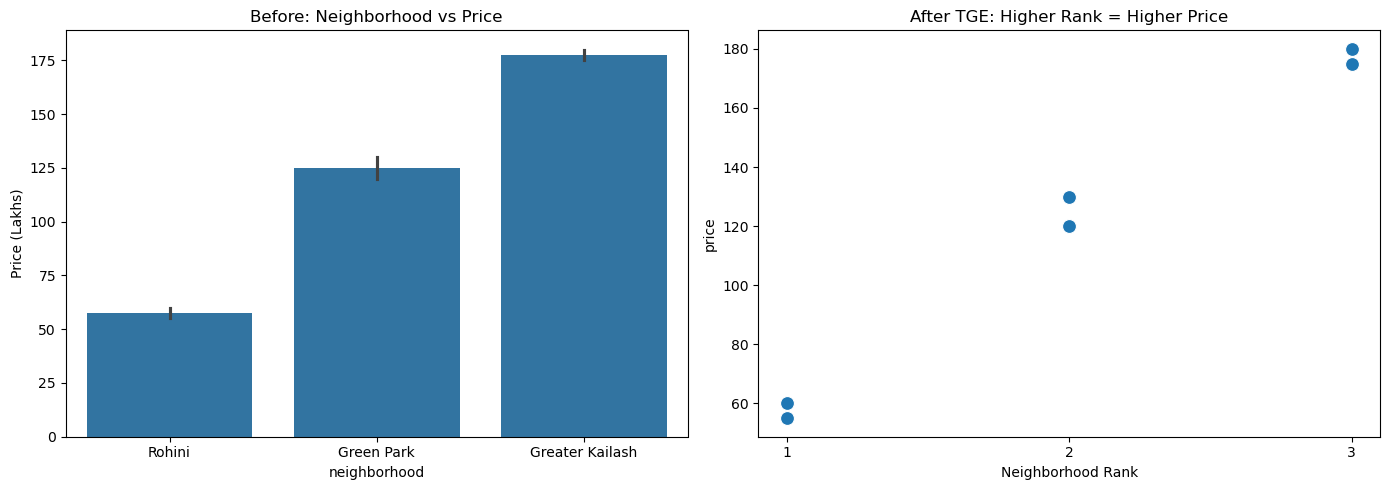

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='neighborhood', y='price', data=df_house, ax=ax1, order=mean_price.index)
ax1.set_title('Before: Neighborhood vs Price')
ax1.set_ylabel('Price (Lakhs)')

sns.scatterplot(x='neighborhood_encoded', y='price', data=df_house, ax=ax2, s=100)
ax2.set_title('After TGE: Higher Rank = Higher Price')
ax2.set_xlabel('Neighborhood Rank')
ax2.set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

---

## 3. Example 2: Customer Churn Prediction by City Tier

We have 6 customers from 3 city tiers:

| Customer | City Tier | Churned? (1=Yes) |
|---------|-----------|------------------|
| 1 | Tier 1 | 0 |
| 2 | Tier 3 | 1 |
| 3 | Tier 2 | 0 |
| 4 | Tier 1 | 0 |
| 5 | Tier 3 | 1 |
| 6 | Tier 2 | 1 |

**Goal**: Predict churn → **Tier 3 customers churn more!**

In [10]:
# Create dataset
df_churn = pd.DataFrame({
    'city_tier': ['Tier 1', 'Tier 3', 'Tier 2', 'Tier 1', 'Tier 3', 'Tier 2'],
    'churn': [0, 1, 0, 0, 1, 1]
})

print("Churn Data:")
df_churn

Churn Data:


,city_tier,churn
0,Tier 1,0
1,Tier 3,1
2,Tier 2,0
3,Tier 1,0
4,Tier 3,1
5,Tier 2,1


### Step-by-Step: Target Guided Encoding (Churn)

In [11]:
# Step 1: Mean churn rate per tier
churn_rate = df_churn.groupby('city_tier')['churn'].mean().sort_values()
print("Churn Rate by City Tier:")
print(churn_rate.round(2))

Churn Rate by City Tier:
city_tier
Tier 1    0.0
Tier 2    0.5
Tier 3    1.0
Name: churn, dtype: float64


In [12]:
# Step 2: Rank by churn rate
rank_map_churn = {tier: rank + 1 for rank, tier in enumerate(churn_rate.index)}
print("\nRank Mapping (1=lowest churn):")
for tier, rank in rank_map_churn.items():
    print(f"  {tier} → Rank {rank} (Churn Rate: {churn_rate[tier]:.0%})")


Rank Mapping (1=lowest churn):
  Tier 1 → Rank 1 (Churn Rate: 0%)
  Tier 2 → Rank 2 (Churn Rate: 50%)
  Tier 3 → Rank 3 (Churn Rate: 100%)


In [13]:
# Step 3: Apply encoding
df_churn['tier_encoded'] = df_churn['city_tier'].map(rank_map_churn)
print("\nAfter Encoding:")
df_churn[['city_tier', 'churn', 'tier_encoded']]


After Encoding:


,city_tier,churn,tier_encoded
0,Tier 1,0,1
1,Tier 3,1,3
2,Tier 2,0,2
3,Tier 1,0,1
4,Tier 3,1,3
5,Tier 2,1,2


### Visualization: Churn Example

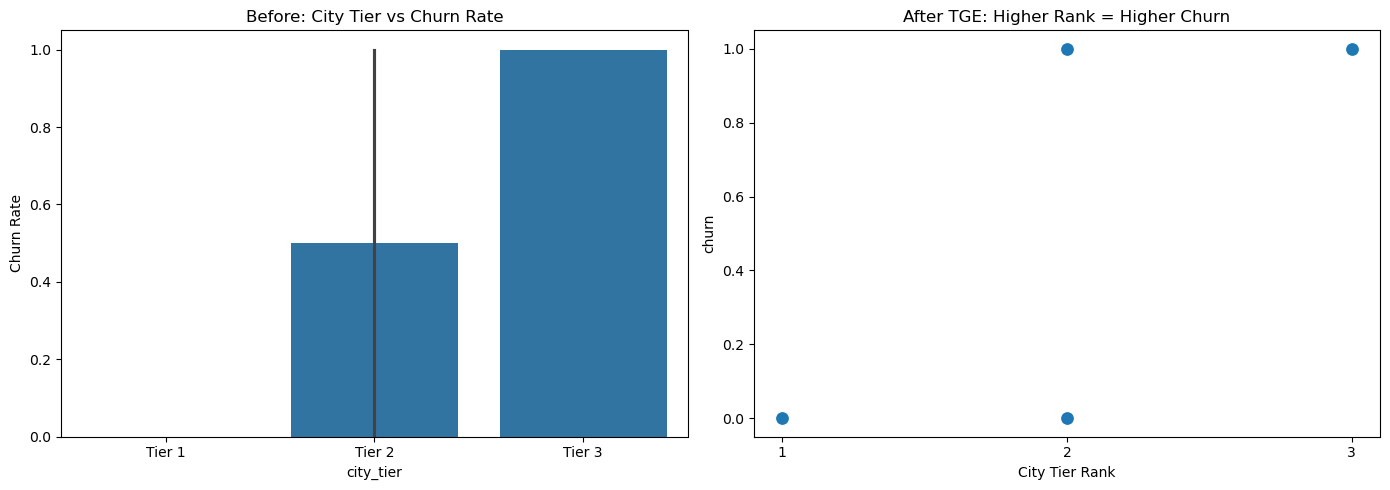

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='city_tier', y='churn', data=df_churn, ax=ax1, order=churn_rate.index)
ax1.set_title('Before: City Tier vs Churn Rate')
ax1.set_ylabel('Churn Rate')

sns.scatterplot(x='tier_encoded', y='churn', data=df_churn, ax=ax2, s=100)
ax2.set_title('After TGE: Higher Rank = Higher Churn')
ax2.set_xlabel('City Tier Rank')
ax2.set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

---

## 4. Critical: Prevent Data Leakage

**Never** use test data to compute means!

```python
# Correct: Fit on TRAIN only
train_mean = df_train.groupby('neighborhood')['price'].mean()
df_test['encoded'] = df_test['neighborhood'].map(train_mean).fillna(0)
```

## 5. Pros & Cons

| Pros | Cons |
|------|------|
| **Captures real pattern** | **Data leakage risk** |
| Great for **linear models** | Overfits small data |
| Handles **high cardinality** | Not for multiclass targets |

---

## 6. Summary

| Example | Category | Target | Insight |
|--------|----------|--------|--------|
| **House Price** | Neighborhood | Price | Higher rank = costlier |
| **Churn** | City Tier | Churn | Higher rank = riskier |

**Key Takeaway**:
> Use **Target Guided Encoding** when a **category strongly predicts the target** — **always fit on training data only**.

---
**End of Notebook**